<a href="https://colab.research.google.com/github/marioklau/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Olah Endocing

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [40]:
data = pd.read_csv("clean_dataset.csv")

In [41]:
data.head()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat (Rp)
0,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1.000.001-1.250.000
1,2,hiperlipidemia,laboratorium,garut,laboratorium,dokter umum,250.001-500.000
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip,dokter umum,<100000
3,4,vertigo,poliklinik,garut,klinik bhakti ip,dokter umum,<100000
4,5,check up,laboratorium,garut,laboratorium,dokter umum,500.001-750.000


In [42]:
data_olah_encoding = data.copy()

encoder = LabelEncoder()
data_olah_encoding['diagnosa_encod'] = encoder.fit_transform(data_olah_encoding['diagnosa'])
data_olah_encoding['institusi_encod'] = encoder.fit_transform(data_olah_encoding['institusi'])
data_olah_encoding['area_encod'] = encoder.fit_transform(data_olah_encoding['area'])
data_olah_encoding['rumah_encod'] = encoder.fit_transform(data_olah_encoding['rumah'])
data_olah_encoding['tipe_encod'] = encoder.fit_transform(data_olah_encoding['tipe'])
data_olah_encoding['biaya_berobat_encod'] = encoder.fit_transform(data_olah_encoding['biaya_berobat (Rp)'])

data_olah_encoding.head()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat (Rp),diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1.000.001-1.250.000,404,5,1,23,0,0
1,2,hiperlipidemia,laboratorium,garut,laboratorium,dokter umum,250.001-500.000,409,2,6,14,0,2
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip,dokter umum,<100000,409,3,6,8,0,5
3,4,vertigo,poliklinik,garut,klinik bhakti ip,dokter umum,<100000,1270,3,6,8,0,5
4,5,check up,laboratorium,garut,laboratorium,dokter umum,500.001-750.000,119,2,6,14,0,3


In [43]:
data_olah_encoding = data_olah_encoding.drop(['diagnosa', 'institusi', 'area', 'rumah', 'tipe', 'biaya_berobat (Rp)'], axis=1)
data_olah_encoding.head()

,no,diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,404,5,1,23,0,0
1,2,409,2,6,14,0,2
2,3,409,3,6,8,0,5
3,4,1270,3,6,8,0,5
4,5,119,2,6,14,0,3


## K-Means

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

      principal component 1  principal component 2
0              -2499.951998            -153.503163
1              -2498.956111            -148.540057
2              -2497.958028            -148.566975
3              -2497.216983             712.418861
4              -2495.868882            -438.534202
...                     ...                    ...
4996            2496.121359            -397.003574
4997            2497.137901            -452.002351
4998            2498.142112            -466.001816
4999            2499.037724            -139.094930
5000            2500.122109            -400.001047

[5001 rows x 2 columns]


Text(0.5, 1.0, 'Hasil PCA')

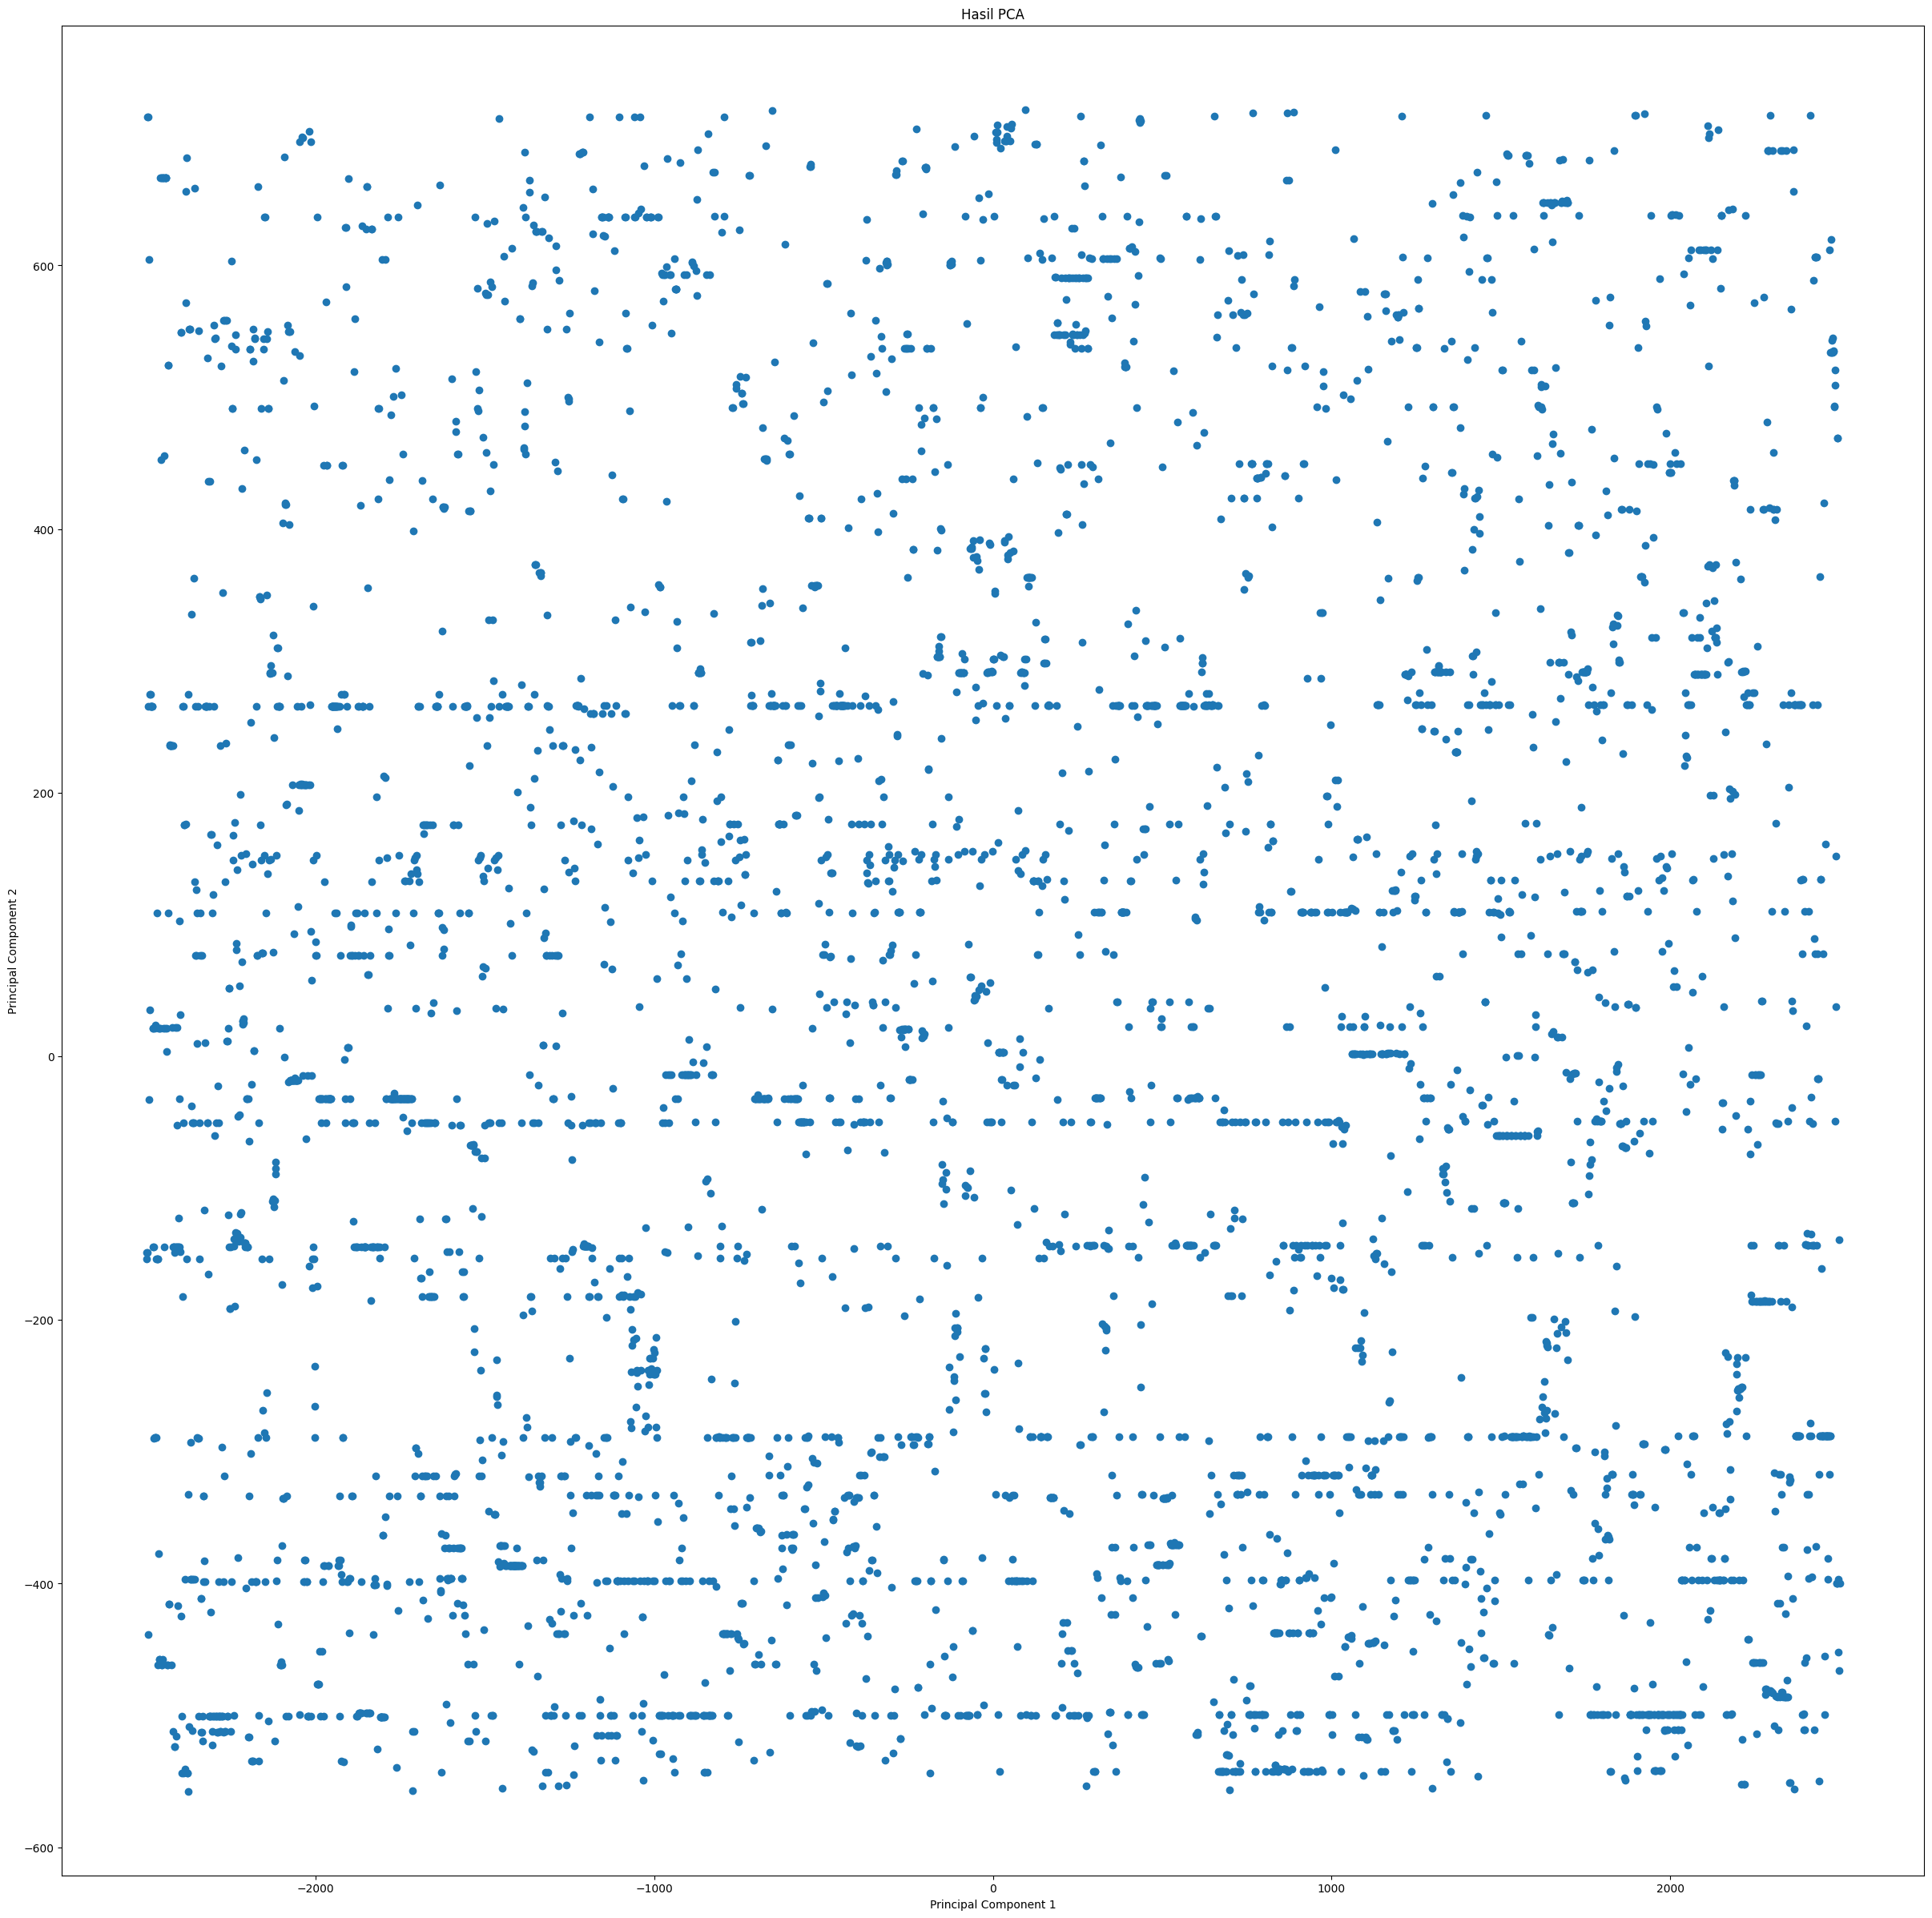

In [45]:
x = data_olah_encoding
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

print(principalDf)
plt.figure(figsize=(30,30))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil PCA')

In [46]:
from sklearn.cluster import KMeans

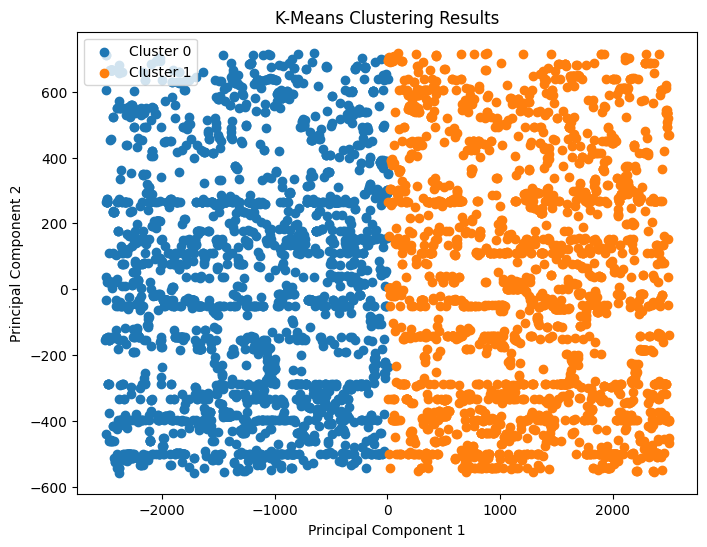

In [47]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

## Autoencoder

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [98]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_olah_encoding)

input_dim = scaled_data.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
d_encoded = Dense(encoding_dim, activation='relu')(input_layer)
d_decoded = Dense(input_dim, activation='sigmoid')(d_encoded)

autoencoder = Model(input_layer, d_decoded)
encoder = Model(input_layer, d_encoded)

autoencoder.compile(optimizer='adam', loss='mse')

epoch = 150
autoencoder.fit(scaled_data, scaled_data, epochs=epoch, batch_size=32, shuffle=True)

encoded_data = encoder.predict(scaled_data)

encoded_df = pd.DataFrame(encoded_data, columns=['encoded_feature_1', 'encoded_feature_2'])

print(encoded_df.head())


Epoch 1/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1022
Epoch 2/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0889
Epoch 3/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0744
Epoch 4/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0645
Epoch 5/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0576
Epoch 6/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0547
Epoch 7/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0520
Epoch 8/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0495
Epoch 9/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0496
Epoch 10/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0493
Epoch 11/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0485
Epoch 12/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0472
Epoch 13/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0476
Epoch 14/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0473
Epoch 15/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1

## Visualisasi

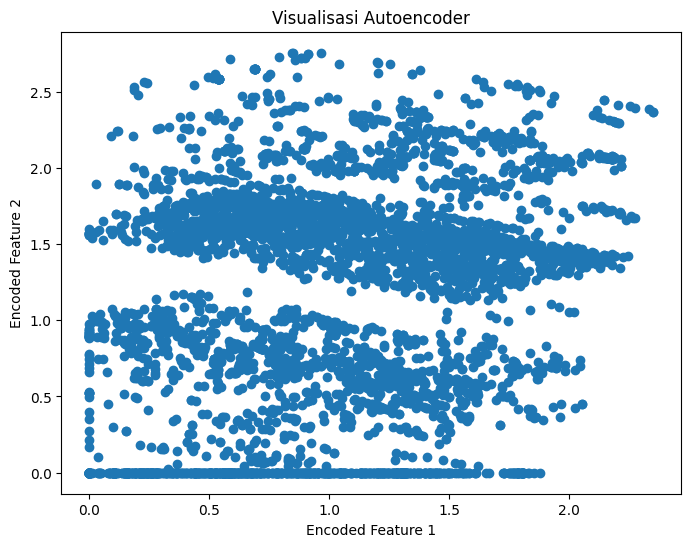

In [99]:
plt.figure(figsize=(8, 6))
plt.scatter(encoded_df['encoded_feature_1'], encoded_df['encoded_feature_2'])
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.title('Visualisasi Autoencoder')
plt.show()

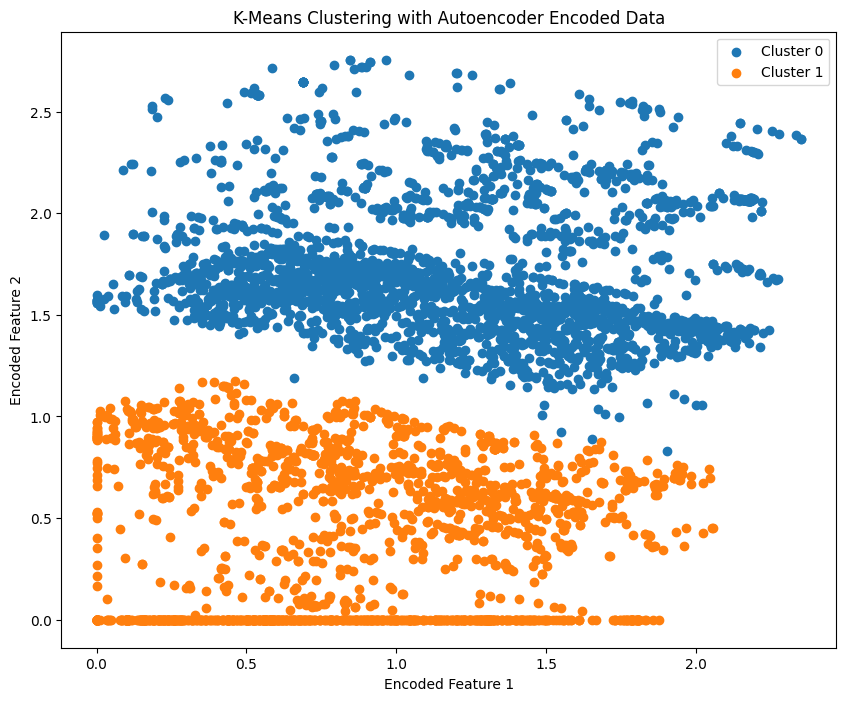

In [101]:
x_autoencoder = encoded_df[['encoded_feature_1', 'encoded_feature_2']]

n_clusters = 2
kmeans_autoencoder = KMeans(n_clusters=n_clusters)
kmeans_autoencoder.fit(x_autoencoder)
labels_autoencoder = kmeans_autoencoder.labels_

x_autoencoder['cluster'] = labels_autoencoder

plt.figure(figsize=(10, 8))
for i in range(n_clusters):
  plt.scatter(x_autoencoder[x_autoencoder['cluster'] == i]['encoded_feature_1'],
              x_autoencoder[x_autoencoder['cluster'] == i]['encoded_feature_2'],
              label=f'Cluster {i}')

plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.title('K-Means Clustering with Autoencoder Encoded Data')
plt.legend()
plt.show()